In [1]:
import pandas as pd
df = pd.read_csv("../data/df_baseline.csv")

## Load Data

In [2]:
print(df.shape)
df.head()

(1091, 18)


,label,artist,album,genre,single_count,freq_billboard,freq_genius,freq_theSource,freq_xxl,rating_AOTY,rating_meta,rating_pitch,twitter,instagram,facebook,spotify,soundcloud,youtube
0,0,Flash Bang Grenada,10 Haters,hiphop,0,0,0,0,0,NaN,NaN,NaN,0,0,0,346,0,0
1,0,Aggro Santos,AggroSantos.com,hiphop,3,0,0,0,0,NaN,NaN,NaN,63771,27415,596562,4675,585,7975
2,0,AKA,Altar Ego,hiphop,4,0,0,1,2,NaN,NaN,NaN,38958,0,0,22298,0,3643764
3,0,Shlohmo,Bad Vibes,hiphop,0,0,0,0,67,NaN,NaN,7.8,91790,59340,209063,141268,283539,0
4,0,Glasses Malone,Beach Cruiser,hiphop,4,0,0,0,4,NaN,NaN,NaN,68417,48745,93741,16402,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 18 columns):
label             1091 non-null int64
artist            1091 non-null object
album             1091 non-null object
genre             1091 non-null object
single_count      1091 non-null int64
freq_billboard    1091 non-null int64
freq_genius       1091 non-null int64
freq_theSource    1091 non-null int64
freq_xxl          1091 non-null int64
rating_AOTY       61 non-null float64
rating_meta       324 non-null float64
rating_pitch      220 non-null float64
twitter           1091 non-null int64
instagram         1091 non-null int64
facebook          1091 non-null int64
spotify           1091 non-null int64
soundcloud        1091 non-null int64
youtube           1091 non-null int64
dtypes: float64(3), int64(12), object(3)
memory usage: 153.5+ KB


**Note**
- 온라인매체 기사의 양, 평론가 평점은 Null Value가 있기 때문에, 당장 Decision Tree를 통해 학습을 시킬 수 없어, Feature에서 제외를 한다.

## Data Preparation for Modeling

#### 장르 `hiphop`, `R&B`, `Soul`, `Funk`, `Pop`

In [4]:
df = pd.get_dummies(df, columns=['genre'])

In [5]:
df.columns

Index(['label', 'artist', 'album', 'single_count', 'freq_billboard',
       'freq_genius', 'freq_theSource', 'freq_xxl', 'rating_AOTY',
       'rating_meta', 'rating_pitch', 'twitter', 'instagram', 'facebook',
       'spotify', 'soundcloud', 'youtube', 'genre_funk', 'genre_hiphop',
       'genre_pop', 'genre_rnb', 'genre_soul'],
      dtype='object')

In [6]:
feature_names = ['single_count', 'freq_billboard',
                 'freq_genius', 'freq_theSource', 'freq_xxl',
                 'twitter', 'instagram', 'facebook',
                 'spotify', 'soundcloud', 'youtube',
                 'genre_funk', 'genre_hiphop', 'genre_pop', 'genre_rnb', 'genre_soul']
dfX = df[feature_names].copy()
dfy = df['label'].copy()

In [7]:
dfX.tail()

,single_count,freq_billboard,freq_genius,freq_theSource,freq_xxl,twitter,instagram,facebook,spotify,soundcloud,youtube,genre_funk,genre_hiphop,genre_pop,genre_rnb,genre_soul
1086,0,0,0,200,9,3708,7855,10703,15130,1043,14066,0,0,1,0,0
1087,3,2,0,0,9,600,286554,355355,329507,21954,1728617,0,0,1,0,0
1088,2,0,0,0,0,1913,23837,9187,16544,756,743,0,0,1,0,0
1089,6,2,0,0,0,11571,27192,27615,60983,6295,43228,0,0,1,0,0
1090,4,1,0,0,213,19974,27428,60138,37009,2341,22642,0,0,1,0,0


In [8]:
dfy.tail()

1086    0
1087    0
1088    0
1089    0
1090    0
Name: label, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

In [10]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=7).fit(X_train, y_train)

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
confusion_matrix(y_train, model.predict(X_train))

array([[614,  28],
       [ 39, 137]])

In [13]:
confusion_matrix(y_test, model.predict(X_test))

array([[206,  16],
       [ 16,  35]])

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_train, model.predict(X_train)))

             precision    recall  f1-score   support

          0       0.94      0.96      0.95       642
          1       0.83      0.78      0.80       176

avg / total       0.92      0.92      0.92       818



In [15]:
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.93      0.93      0.93       222
          1       0.69      0.69      0.69        51

avg / total       0.88      0.88      0.88       273



In [16]:
for name, importance in zip(dfX.columns, model.feature_importances_):
    print(name, importance)

single_count 0.009248087111959884
freq_billboard 0.0
freq_genius 0.01481205253987691
freq_theSource 0.04331357003440207
freq_xxl 0.057167888137927884
twitter 0.024689177886677516
instagram 0.10549564403691525
facebook 0.0
spotify 0.11235962077272078
soundcloud 0.45051846736812645
youtube 0.01402598065279916
genre_funk 0.0
genre_hiphop 0.0
genre_pop 0.16836951145859413
genre_rnb 0.0
genre_soul 0.0


In [25]:
X_train.shape

(818, 16)

In [28]:
model.predict_proba(X_test)[:, 1]

array([0.81481481, 0.17647059, 0.        , 0.        , 0.00862069,
       0.00862069, 1.        , 0.00862069, 0.        , 0.07317073,
       0.15      , 0.        , 0.        , 0.        , 0.        ,
       0.3       , 0.00862069, 0.17647059, 0.        , 0.        ,
       1.        , 0.66101695, 0.81481481, 0.17647059, 0.        ,
       0.81481481, 1.        , 0.15      , 0.        , 0.3       ,
       0.07317073, 0.07317073, 0.3       , 0.        , 0.        ,
       1.        , 0.00862069, 0.        , 0.        , 0.        ,
       1.        , 1.        , 0.00862069, 0.        , 0.        ,
       0.        , 0.        , 0.00862069, 0.        , 0.66101695,
       0.00862069, 0.        , 0.17647059, 0.        , 0.        ,
       0.        , 0.28888889, 0.        , 0.        , 0.15      ,
       0.        , 0.15      , 0.00862069, 0.07317073, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.33333333, 0.     

In [29]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresholds1 = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

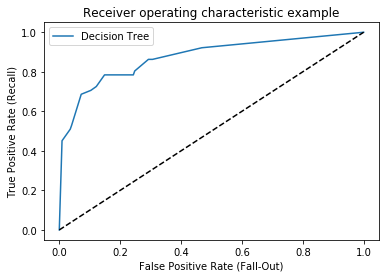

In [32]:
import matplotlib.pyplot as plt

plt.plot(fpr1, tpr1, label="Decision Tree")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

Fall-out보다 Recall이 더 빠르게 증가하는 모형은 좋은 모형으로 생각할 수 있다.  
이를 중점적으로 생각해서 개선해보자